### Imports

In [59]:
import os
import random
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
labels_path = r'E:\Projects\Wound-Classification-DL\models\labels_cnn.csv'

labels_df = pd.read_csv(labels_path)

labels = dict(zip(labels_df['Class'], labels_df['Index']))

labels = list(labels.keys())

print('Labels:', labels)

Labels: ['Abrasions', 'Bruises', 'Burns', 'Cut', 'Diabetic Wounds', 'Laseration', 'Normal', 'Pressure Wounds', 'Surgical Wounds', 'Venous Wounds']


In [61]:
def preprocess_image(image_path, target_size=(128, 128)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    return np.expand_dims(img_array, axis=0), img

### Test on Validation Data

1/1 [==============================] - 0s 151ms/step


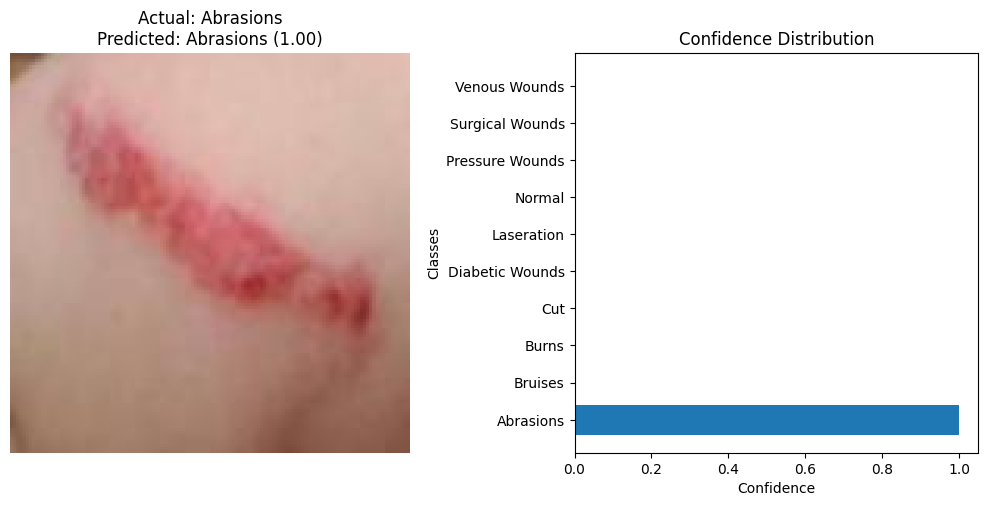

1/1 [==============================] - 0s 21ms/step


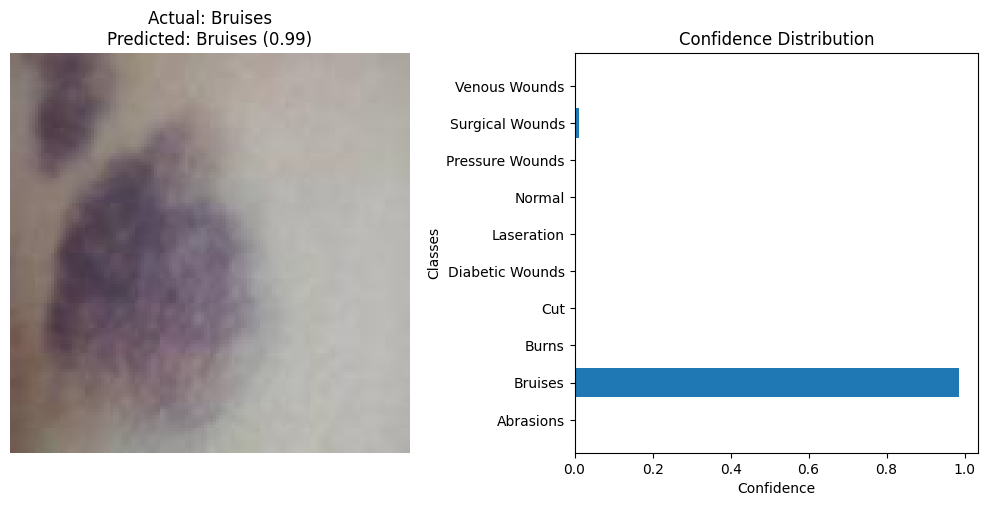

1/1 [==============================] - 0s 19ms/step


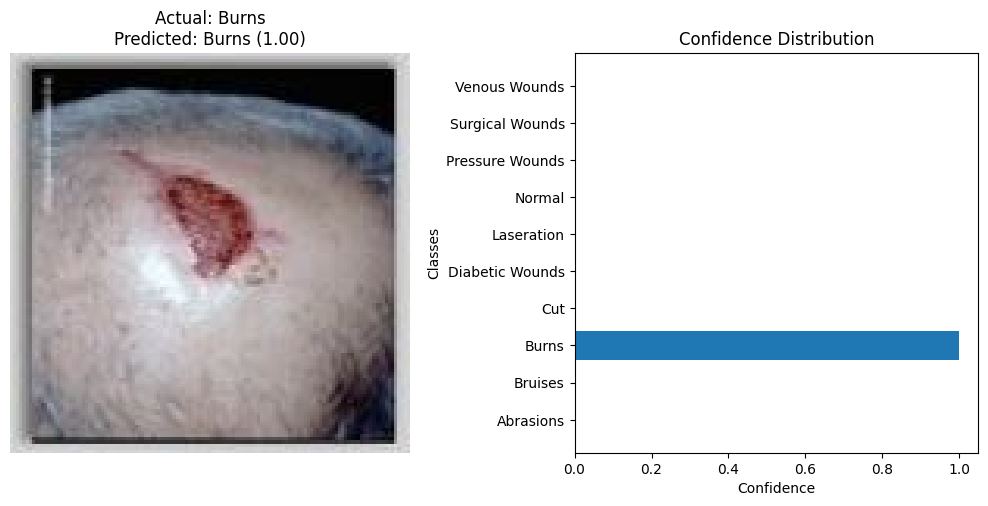

1/1 [==============================] - 0s 26ms/step


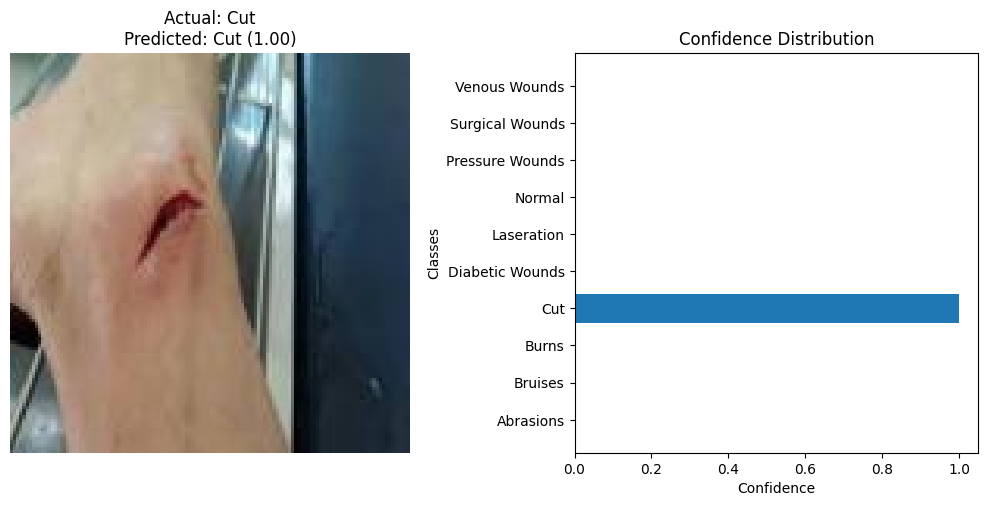

1/1 [==============================] - 0s 23ms/step


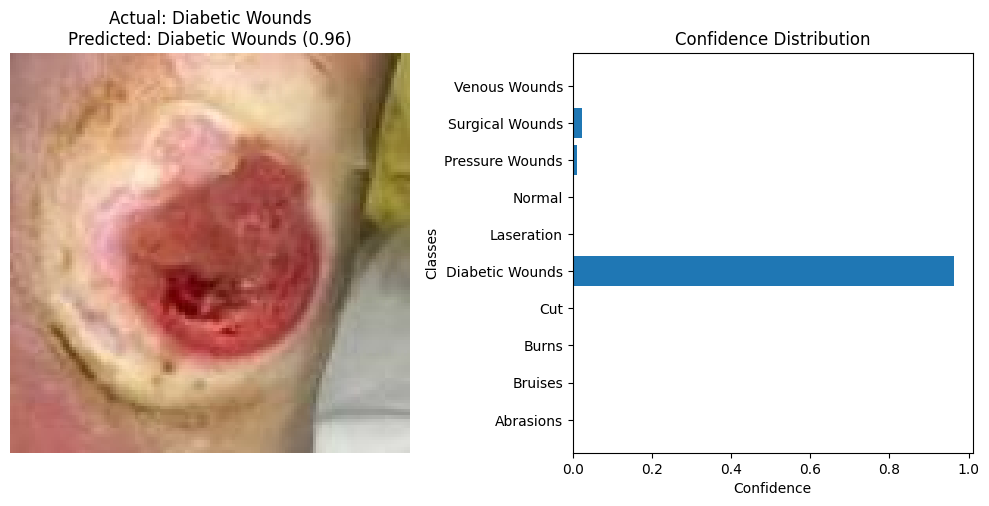

1/1 [==============================] - 0s 21ms/step


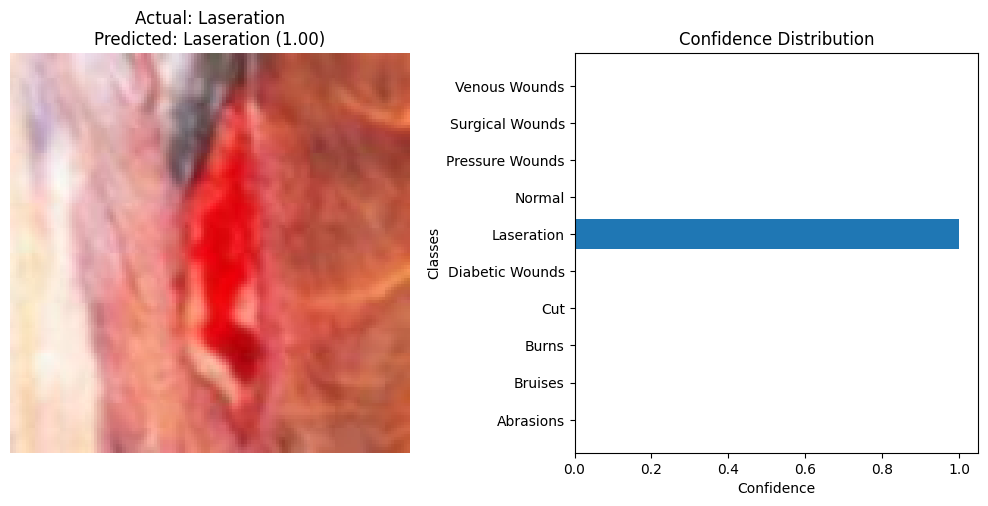

1/1 [==============================] - 0s 22ms/step


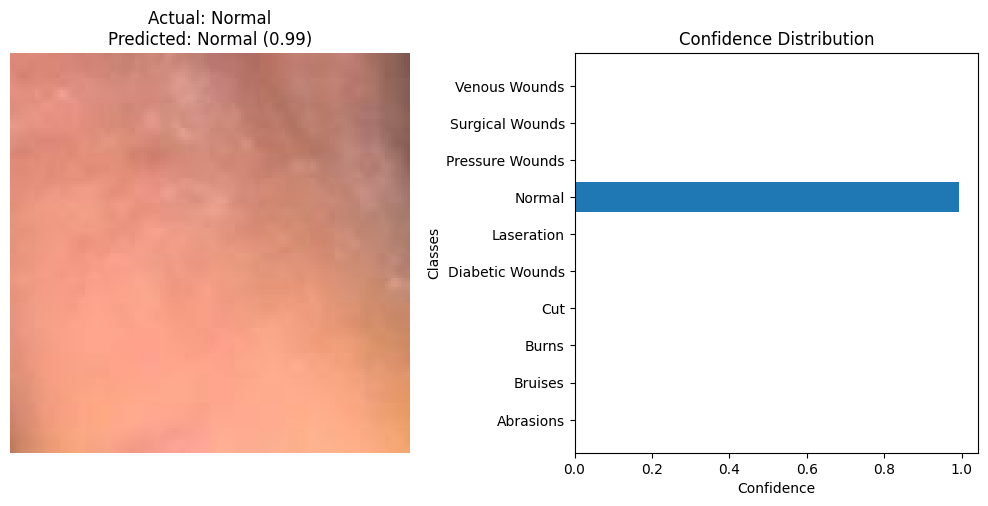

1/1 [==============================] - 0s 25ms/step


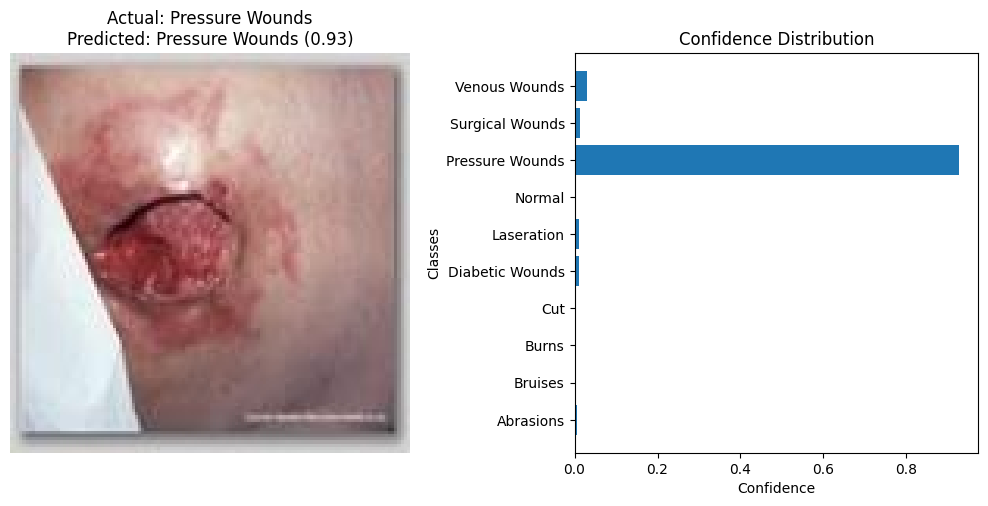

1/1 [==============================] - 0s 88ms/step


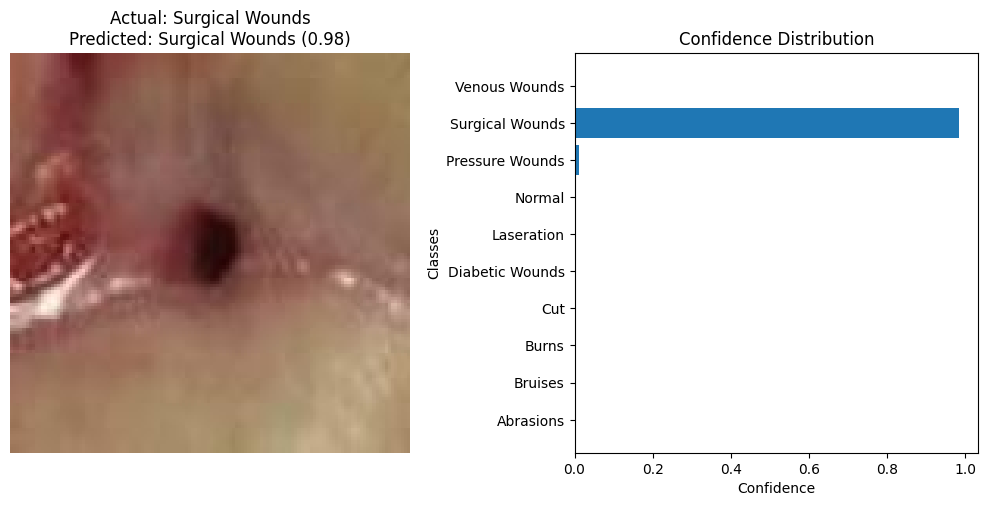

1/1 [==============================] - 0s 20ms/step


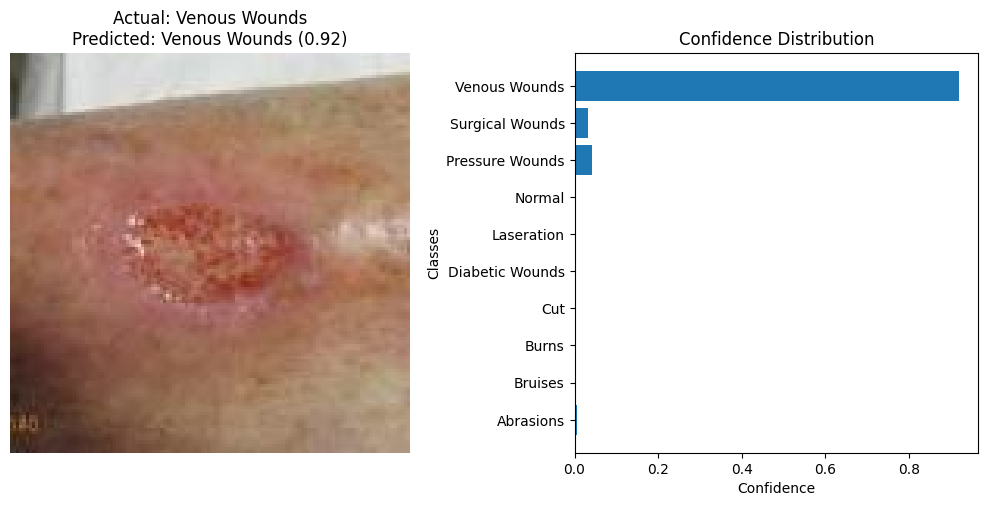

In [62]:
val_folder = r'E:\Projects\Wound-Classification-DL\data\val'
model_path = r'E:\Projects\Wound-Classification-DL\models\best_cnn.h5'

model = tf.keras.models.load_model(model_path)

class_dirs = [d for d in os.listdir(val_folder) if os.path.isdir(os.path.join(val_folder, d))]

for class_dir in class_dirs:
    class_path = os.path.join(val_folder, class_dir)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    random_image_file = random.choice(image_files)
    image_path = os.path.join(class_path, random_image_file)
    input_data, original_image = preprocess_image(image_path)
    pred = model.predict(input_data)
    predicted_idx = np.argmax(pred, axis=1)[0]
    confidence_score = np.max(pred, axis=1)[0]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title(f'Actual: {class_dir}\nPredicted: {labels[predicted_idx]} ({confidence_score:.2f})')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.barh(range(len(pred[0])), pred[0])
    plt.yticks(range(len(pred[0])), [labels[i] for i in range(len(pred[0]))])
    plt.title('Confidence Distribution')
    plt.xlabel('Confidence')
    plt.ylabel('Classes')

    plt.tight_layout()
    plt.show()

### Test on New Data (From Google Search)

1/1 [==============================] - 0s 36ms/step


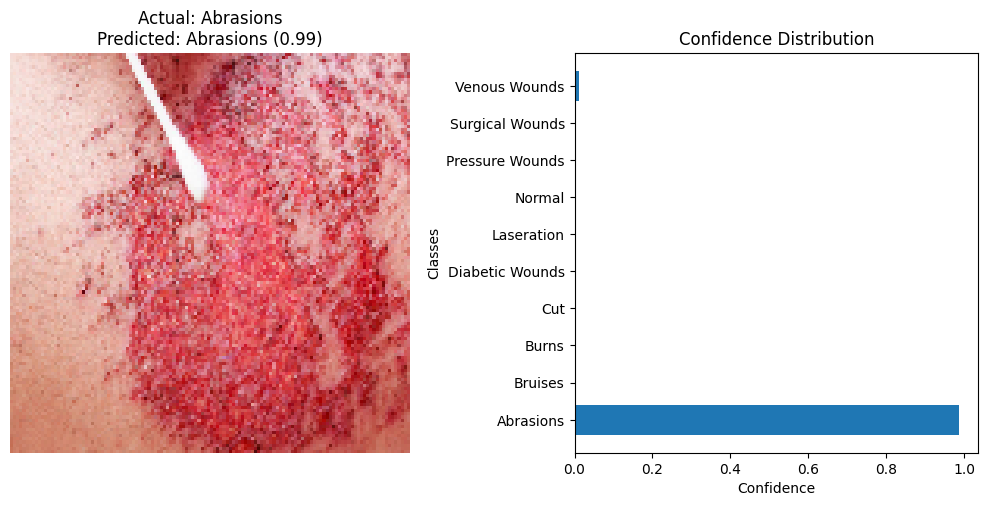

1/1 [==============================] - 0s 22ms/step


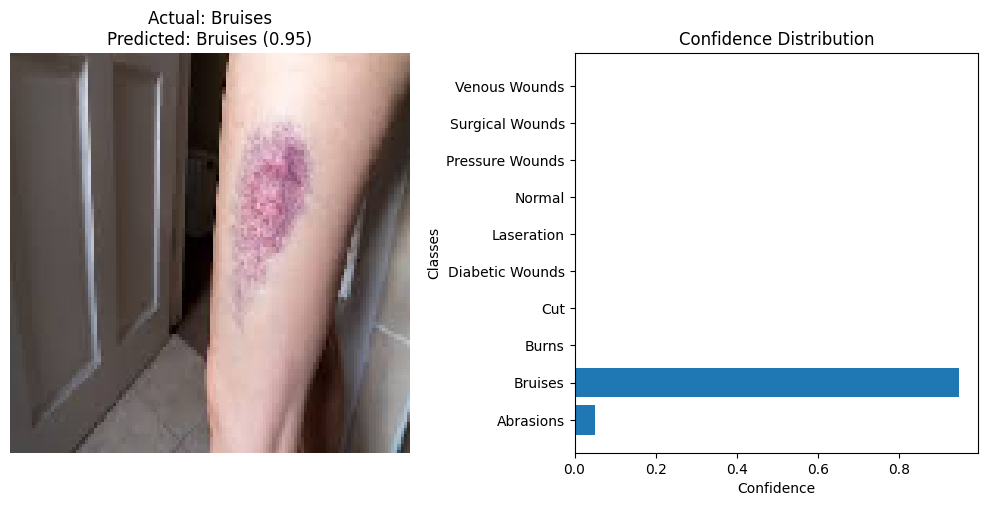

1/1 [==============================] - 0s 20ms/step


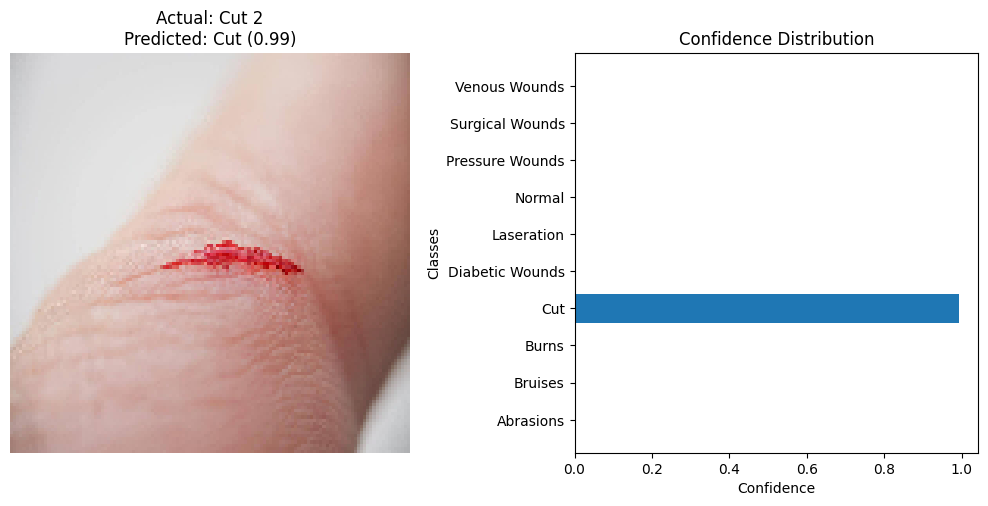

1/1 [==============================] - 0s 19ms/step


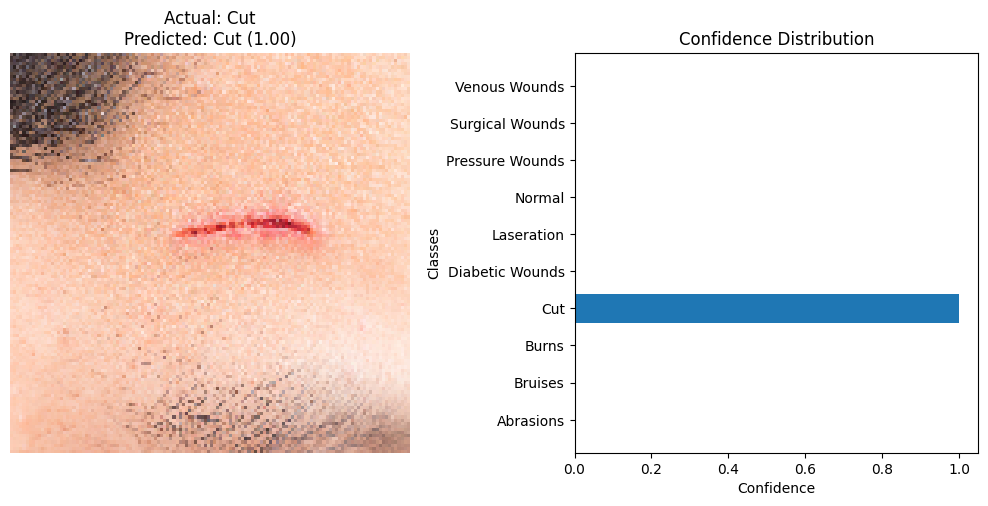

1/1 [==============================] - 0s 22ms/step


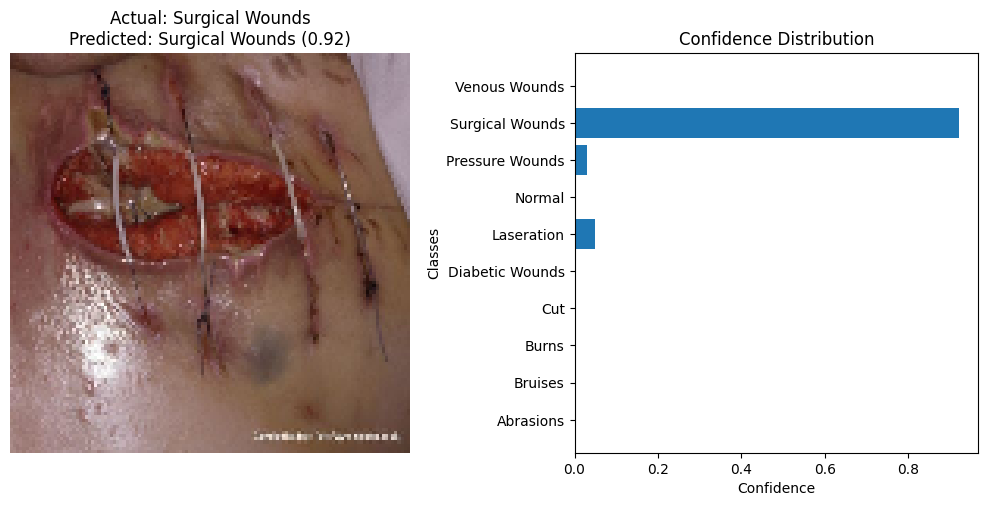

1/1 [==============================] - 0s 21ms/step


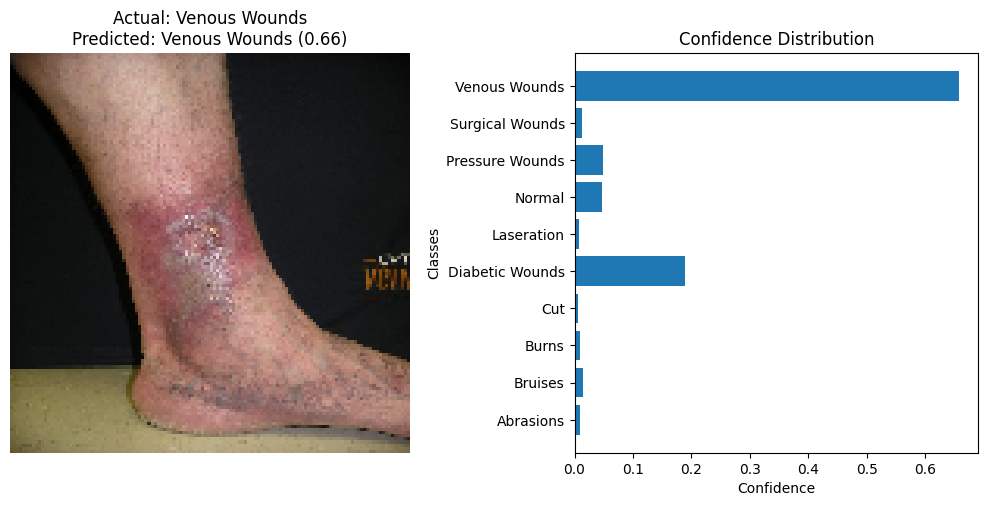

In [74]:
test_folder = r'E:\Projects\Wound-Classification-DL\data\test'

test_images = [f for f in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, f))]

for image_file in test_images:
    image_path = os.path.join(test_folder, image_file)
    input_data, original_image = preprocess_image(image_path)
    pred = model.predict(input_data)
    predicted_idx = np.argmax(pred, axis=1)[0]
    confidence_score = np.max(pred, axis=1)[0]
    actual_label = image_file.split('.')[0]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title(f'Actual: {actual_label}\nPredicted: {labels[predicted_idx]} ({confidence_score:.2f})')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.barh(range(len(pred[0])), pred[0])
    plt.yticks(range(len(pred[0])), [labels[i] for i in range(len(pred[0]))])
    plt.title('Confidence Distribution')
    plt.xlabel('Confidence')
    plt.ylabel('Classes')

    plt.tight_layout()
    plt.show()